In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import random
import platform

In [2]:
def os_setting():
    if platform.system() == 'Darwin': #맥
            plt.rc('font', family='AppleGothic') 
    elif platform.system() == 'Windows': #윈도우
            plt.rc('font', family='Malgun Gothic') 
    elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
            #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
            #!mv malgun.ttf /usr/share/fonts/truetype/
            #import matplotlib.font_manager as fm 
            #fm._rebuild() 
            plt.rc('font', family='Malgun Gothic') 
    plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
    
os_setting()

In [6]:
path = 'D:/shin/data/' 
fig_path = 'D:/shin/최종 소스코드 및 데이터/fig/'
data = pd.read_csv('/content/근로형태별_근로자현황_mg변형.csv')
del data['Unnamed: 0']

In [7]:
df = data[['성별(1)', '산업별(1)', '2021']]
df = df.iloc[2:,:]
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric)
df.columns = ['성별', '산업별', '2021']

In [8]:
drop_idx = df[df['산업별'] == 'a. 계'].index
df = df.drop(drop_idx)
df = df.reset_index()
del(df['index'])

In [9]:
df

,성별,산업별,2021
0,전체,"b. 농업, 임업 및 어업",124
1,전체,c. 광업,12
2,전체,d. 제조업,3865
3,전체,"e. 전기, 가스, 증기 및 공기조절 공급업",70
4,전체,"f. 수도, 하수 및 폐기물 처리, 원료 재생업",156
...,...,...,...
58,남자,r. 보건업 및 사회복지 서비스업,444
59,남자,"s. 예술, 스포츠 및 여가관련 서비스업",161
60,남자,"t. 협회 및 단체, 수리 및 기타 개인 서비스업",368
61,남자,u. 가구내 고용활동 및 달리 분류되지 않은 자가소비 생산활동,3


In [10]:
df_pivot = df.pivot(index = '산업별', columns='성별', values='2021')

In [12]:
df

,성별,산업별,2021
0,전체,"b. 농업, 임업 및 어업",124
1,전체,c. 광업,12
2,전체,d. 제조업,3865
3,전체,"e. 전기, 가스, 증기 및 공기조절 공급업",70
4,전체,"f. 수도, 하수 및 폐기물 처리, 원료 재생업",156
...,...,...,...
58,남자,r. 보건업 및 사회복지 서비스업,444
59,남자,"s. 예술, 스포츠 및 여가관련 서비스업",161
60,남자,"t. 협회 및 단체, 수리 및 기타 개인 서비스업",368
61,남자,u. 가구내 고용활동 및 달리 분류되지 않은 자가소비 생산활동,3


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backen

FileNotFoundError: ignored

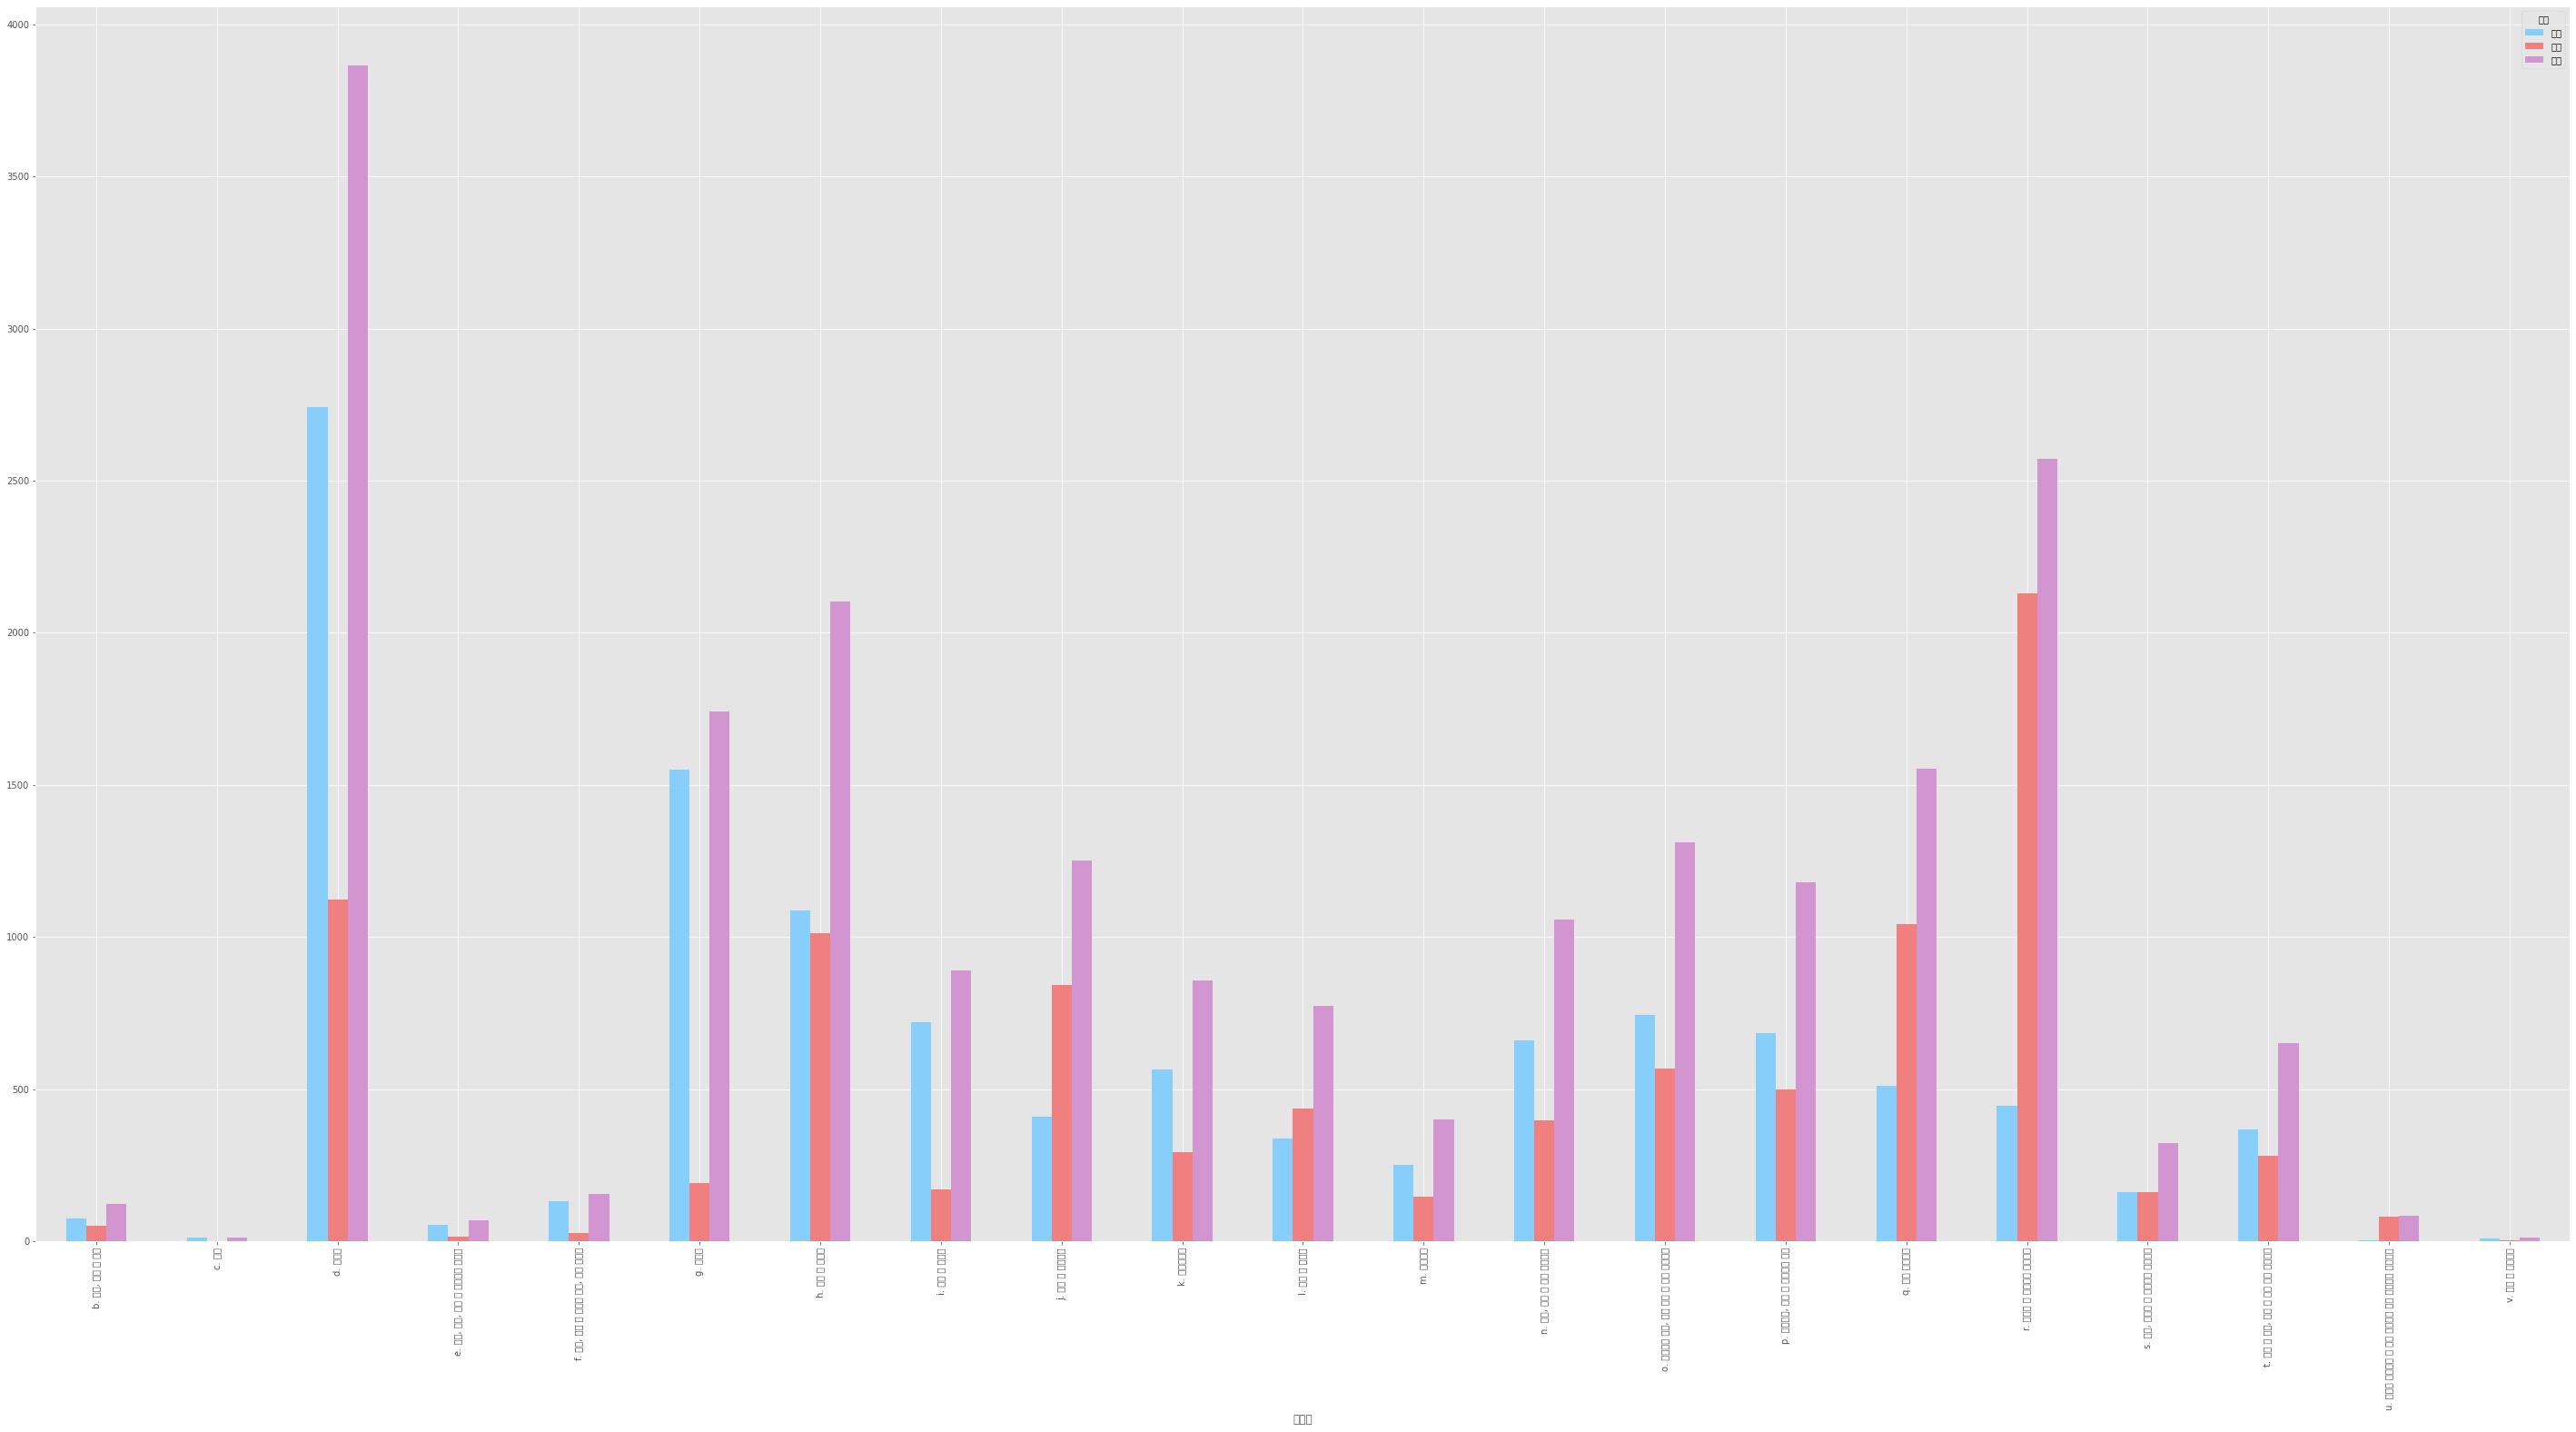

In [11]:
df_pivot.plot.bar(figsize=(50,25), color = ['lightskyblue', 'lightcoral', '#d395d0'])
plt.rc('font', size=25) 
plt.rc('axes', labelsize=50)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=50)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=50)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

plt.savefig(fig_path + '산업별 성별 근로자 현황.jpg')